In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [93]:
df_features = pd.read_csv(filepath_or_buffer='training_data/landmarks.csv',
                 index_col='pose_id')

df_features.head()

,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,x_left_eye_outer,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
pose_id,,,,,,,,,,,,,,,,,,,,,
0,-5.889507,-57.637520,-45.019750,-4.656085,-62.832863,-44.571823,-3.302626,-63.386856,-44.567863,-2.032406,...,56.852562,-0.842025,35.037060,50.565020,5.842190,45.971020,50.263714,0.092779,45.842150,41.427795
1,-4.255504,-62.935925,-128.907500,-2.977403,-67.035990,-124.258545,-2.215265,-67.198250,-124.263240,-1.494903,...,-14.129170,-1.298891,54.733307,-6.886051,3.980098,65.370830,-49.023930,-5.090634,65.641780,-42.878056
2,-2.878917,-61.709988,-137.453340,-1.619050,-65.693750,-132.181660,-0.785822,-65.814340,-132.184070,-0.019743,...,-19.904400,-2.119770,51.265694,-15.554097,1.994894,62.725025,-57.717957,-4.452602,62.494457,-53.804527
3,-4.242575,-60.371220,-135.094830,-3.118133,-64.416000,-129.995930,-2.369744,-64.603290,-130.003400,-1.753780,...,-6.855729,-1.485475,59.729427,1.433403,1.950102,68.187256,-42.989098,-4.573338,68.144350,-34.117043
4,-0.805543,-56.178570,-41.124413,-0.055174,-58.501305,-37.938560,0.456936,-58.473960,-37.954430,0.969290,...,47.124107,-2.455719,52.861732,45.936783,2.699764,57.254112,27.531416,-2.288348,57.803005,26.288315


In [94]:
df_labels = pd.read_csv(filepath_or_buffer='training_data/labels.csv',
                        index_col='pose_id')
df_labels.head()

,pose
pose_id,
0,jumping_jacks_down
1,jumping_jacks_down
2,jumping_jacks_down
3,jumping_jacks_down
4,jumping_jacks_down


In [95]:
X = df_features.values
y = pd.get_dummies(df_labels, dtype=int).values

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38, stratify=y)

In [97]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
type(X_train)

numpy.ndarray

In [99]:
model = Sequential([
    Input(shape=(99,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,530 (76.29 KB)

 Trainable params: 19,530 (76.29 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
def stop_early(check, patience=10):
    earlystopping=EarlyStopping(patience=patience,
                                restore_best_weights=True,
                                monitor=check,
                                mode='max',
                                start_from_epoch=50)
    return earlystopping

In [101]:
model.compile(optimizer='adam', metrics=['f1_score'], loss='categorical_focal_crossentropy')
model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - f1_score: 0.1945 - loss: 0.4083 - val_f1_score: 0.4526 - val_loss: 0.2752
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.5743 - loss: 0.2107 - val_f1_score: 0.6637 - val_loss: 0.1758
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.6888 - loss: 0.1170 - val_f1_score: 0.7599 - val_loss: 0.1579
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.7387 - loss: 0.0857 - val_f1_score: 0.7427 - val_loss: 0.1357
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.8267 - loss: 0.0647 - val_f1_score: 0.7317 - val_loss: 0.1379
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.7963 - loss: 0.0614 - val_f1_score: 0.7012 - val_loss: 0.1433
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.7498 - loss: 0.0579 - val_f1_score: 0.7465 - val_loss: 0.1351
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.8284 - loss: 0.0469 - val_f1_score: 0.7864 - v

ValueError: x and y must have same first dimension, but have shapes (50,) and (100, 10)

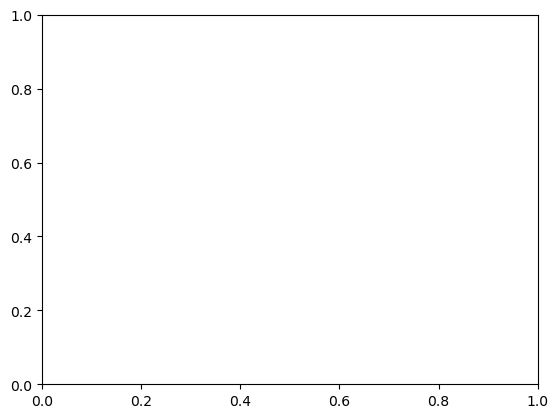

In [102]:
plt.plot(range(0,50),model.history.history['f1_score'])

In [103]:
model.history.history['f1_score']

[<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.5671641 , 0.5091863 , 0.24999994, 0.02272726, 0.2765957 ,
        0.54088044, 0.59649116, 0.        , 0.37914687, 0.11891886],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.7205387 , 0.7092198 , 0.56459326, 0.5274725 , 0.8169013 ,
        0.89230764, 0.88235295, 0.3908046 , 0.62962955, 0.13207546],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.7575757 , 0.7537313 , 0.6903553 , 0.5766871 , 0.8652482 ,
        0.9222798 , 0.92307687, 0.67692304, 0.8191489 , 0.34831455],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.77655673, 0.77647054, 0.75490195, 0.6626506 , 0.8510638 ,
        0.90052354, 0.92307687, 0.7625899 , 0.8571428 , 0.40449435],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.79693484, 0.78260857, 0.7804877 , 0.75471693, 0.9264705 ,
        0.964467  , 0.9384614 , 0.84285706, 0.90

In [111]:
y_res = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step


In [118]:
y_res>0.6

array([[False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

In [88]:
y_res = np.argmax(y_res, axis=1)

In [89]:
y_true = np.argmax(y_test, axis=1)

In [90]:
y_true

array([1, 0, 1, 6, 4, 8, 3, 7, 0, 9, 3, 8, 0, 1, 4, 0, 5, 0, 1, 2, 1, 0,
       5, 9, 1, 9, 9, 7, 0, 2, 1, 9, 2, 8, 4, 8, 9, 6, 0, 4, 3, 4, 5, 8,
       2, 3, 1, 8, 7, 5, 6, 7, 2, 6, 0, 2, 5, 0, 3, 2, 0, 2, 7, 9, 9, 0,
       0, 2, 8, 4, 5, 3, 0, 0, 8, 9, 8, 3, 5, 7, 0, 0, 9, 8, 0, 0, 6, 2,
       8, 0, 2, 2, 8, 5, 9, 3, 9, 1, 5, 1, 6, 2, 2, 7, 1, 0, 9, 1, 3, 3,
       9, 4, 8, 1, 1, 6, 2, 3, 1, 0, 5, 5, 4, 2, 9, 6, 5, 2, 3, 3, 1, 1,
       0, 2, 8, 1, 5, 3, 9, 2, 3, 1, 0, 5, 0, 1, 5, 2, 0, 5, 5, 7, 6, 4,
       6, 9, 0, 0, 0, 9, 3, 0, 7, 6, 3, 0, 3, 7, 6, 1, 2, 4, 0, 3, 8, 2,
       1, 5, 3, 3, 6, 3, 1, 4, 9, 9, 9, 7, 9, 9, 6, 3, 3, 4, 8, 1, 4, 2,
       1, 7, 5, 8, 8, 3, 9, 5, 1, 1, 2, 8, 0, 6, 6, 3, 7, 2, 9, 9, 7, 4,
       4, 5, 4, 4, 6, 6, 4, 0, 0, 6, 9, 8, 4, 6, 8, 5, 3, 0, 7, 2, 1, 0,
       4, 1, 1, 5, 2, 7, 5, 9, 7, 2, 7, 3, 1, 1, 9, 1, 9, 5, 0, 1, 5, 5,
       7, 2, 2, 2, 1, 1, 5, 7, 2, 8, 0, 1, 8, 1, 7, 9, 1, 6, 0, 9, 8, 1,
       4, 7, 5, 0, 1, 2, 4, 9, 8, 7, 5, 6, 8, 0, 0,

In [91]:
print(classification_report(y_res, y_true))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        48
           1       0.84      0.84      0.84        45
           2       0.89      0.85      0.87        40
           3       0.56      0.79      0.66        24
           4       0.88      1.00      0.94        23
           5       0.94      0.87      0.91        39
           6       0.92      0.88      0.90        26
           7       0.96      0.77      0.86        31
           8       0.88      0.93      0.90        30
           9       0.71      0.68      0.69        37

    accuracy                           0.85       343
   macro avg       0.85      0.85      0.85       343
weighted avg       0.86      0.85      0.85       343

